# A1: ACCIDENT EXPLORE
- Note book that reads all the accident data collected in the US
- Basic Pre-processing, cleaning and EDA
- Handling Null Values
- Writes multiple csv files that are subsets of the data we want to further explore/model

### 0. Open and read the datafile
- Understand classes and class distribution
- Datatypes and Nulls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Read the dataset 
df = pd.read_csv("../../project_data/US_Accidents_2020.csv") 

In [3]:
df.shape

(1516064, 47)

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [7]:
df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516063,A-4239406,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df['Severity'].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

In [9]:
percent_df = df['Severity'].value_counts()/df.shape[0]*100
percent_df

2    79.969051
3    10.623034
4     7.549286
1     1.858629
Name: Severity, dtype: float64

In [10]:
## Adding a sign column which combines all sign booleans
df['Sign']=df.iloc[:,30:43].any(axis='columns')

In [11]:
df['Sign'].head()

0    False
1    False
2     True
3     True
4    False
Name: Sign, dtype: bool

In [12]:
df['Sign'].value_counts()

False    1084933
True      431131
Name: Sign, dtype: int64

In [13]:
percent_sign = df['Sign'].value_counts()/df.shape[0]*100
percent_sign

False    71.56248
True     28.43752
Name: Sign, dtype: float64

## 1. Null Handling

In [14]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [15]:
# drop columns with too many null values
drop_columns = ['Number','Wind_Chill(F)','Precipitation(in)']

df = df.drop(drop_columns,axis=1)


In [16]:
# drop row with null values
df = df.dropna()

In [17]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [18]:
df.shape

(1370980, 45)

## 2. Data type encoding and preprocessing 

In [19]:
# Mapping for Day and Night to 1 = day , 0 = night 
map_replace = {'Night': 0 ,'Day': 1,'night': 0 ,'day':1}
map_replace

{'Night': 0, 'Day': 1, 'night': 0, 'day': 1}

In [20]:
# Convert columns to values 0 or 1
make_bool = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
df.loc[:,make_bool] = df.loc[:,make_bool].replace(map_replace)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,0,0,0,0,False
5,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,1,1,1,1,False
6,A-2716606,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,True,False,1,1,1,1,True
7,A-2716607,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,At Dela Palma Rd - Accident.,...,False,False,False,False,False,1,1,1,1,False
8,A-2716608,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,...,False,False,False,False,False,1,1,1,1,False


In [21]:
# convert the integers to a bool type
df[make_bool] = df[make_bool].astype('bool',errors='raise')

# convert to category for Severity the columns
df['Severity'] = df['Severity'].astype('category')

In [22]:
## column handling 

In [23]:
# list of continuous columns to keep
#added columns state, start_time and End_time to the dataframe
con_cols = df.iloc[:,21:]
con_col_name = con_cols.columns


# list to keep for washington geo plotting
columns_to_keep_wa = ['ID','Severity','Start_Time', 'End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)','State']
columns_to_keep_wa.extend(con_col_name)
columns_to_keep_wa

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'State',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Sign']

In [24]:
# final list to keep
columns_to_keep = ['ID','Severity','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)']
columns_to_keep.extend(con_col_name)
columns_to_keep

['ID',
 'Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Sign']

In [25]:
data_new = df.loc[:, columns_to_keep]
data_new_wa = df.loc[:, columns_to_keep_wa]

In [26]:
# drop Wind direction and Weather_Timestamp
data_new = data_new.drop(['Wind_Direction','Weather_Condition'],axis=1)
print(data_new.shape)

# drop Wind direction and Weather_Timestamp
data_new_wa = data_new_wa.drop(['Wind_Direction','Weather_Condition'],axis=1)
print(data_new_wa.shape)

(1370980, 29)
(1370980, 32)


In [27]:
#converted 'Start_Time' to datetime64
data_new_wa['Start_Time']= pd.to_datetime(data_new_wa['Start_Time'])

#converted 'End_Time' to datetime64
data_new_wa['End_Time']= pd.to_datetime(data_new_wa['End_Time'])

In [28]:
data_new_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370980 entries, 0 to 1516063
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1370980 non-null  object        
 1   Severity               1370980 non-null  category      
 2   Start_Time             1370980 non-null  datetime64[ns]
 3   End_Time               1370980 non-null  datetime64[ns]
 4   Start_Lat              1370980 non-null  float64       
 5   Start_Lng              1370980 non-null  float64       
 6   End_Lat                1370980 non-null  float64       
 7   End_Lng                1370980 non-null  float64       
 8   Distance(mi)           1370980 non-null  float64       
 9   State                  1370980 non-null  object        
 10  Humidity(%)            1370980 non-null  float64       
 11  Pressure(in)           1370980 non-null  float64       
 12  Visibility(mi)         13709

In [29]:
# continuing analysis on entire data set
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370980 entries, 0 to 1516063
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   ID                     1370980 non-null  object  
 1   Severity               1370980 non-null  category
 2   Start_Lat              1370980 non-null  float64 
 3   Start_Lng              1370980 non-null  float64 
 4   End_Lat                1370980 non-null  float64 
 5   End_Lng                1370980 non-null  float64 
 6   Distance(mi)           1370980 non-null  float64 
 7   Humidity(%)            1370980 non-null  float64 
 8   Pressure(in)           1370980 non-null  float64 
 9   Visibility(mi)         1370980 non-null  float64 
 10  Wind_Speed(mph)        1370980 non-null  float64 
 11  Amenity                1370980 non-null  bool    
 12  Bump                   1370980 non-null  bool    
 13  Crossing               1370980 non-null  bool    
 14  Gi

In [30]:
percent_data = data_new['Severity'].value_counts()/data_new.shape[0]*100
percent_data

2    80.659893
3    10.303287
4     7.025558
1     2.011262
Name: Severity, dtype: float64

Note: the distribution hasnt changed much after dropping null value coulumns 

### 3. Preliminary EDA

In [31]:
data_new.describe()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,1.370980e+06,1.370980e+06,1.370980e+06,1.370980e+06,1.370980e+06,1.370980e+06,1.370980e+06,1.370980e+06,1.370980e+06
mean,3.687072e+01,-9.858667e+01,3.687078e+01,-9.858647e+01,5.744937e-01,6.420014e+01,2.952813e+01,9.145091e+00,7.631396e+00
std,5.202776e+00,1.846727e+01,5.202751e+00,1.846714e+01,1.612182e+00,2.322987e+01,1.030335e+00,2.795097e+00,5.600232e+00
min,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00
25%,3.383234e+01,-1.182171e+02,3.383233e+01,-1.182171e+02,0.000000e+00,4.800000e+01,2.940000e+01,1.000000e+01,4.600000e+00
50%,3.732941e+01,-9.409633e+01,3.732943e+01,-9.409387e+01,1.620000e-01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00
75%,4.073800e+01,-8.092084e+01,4.073834e+01,-8.092127e+01,5.850000e-01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01
max,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,1.000000e+02,5.804000e+01,1.110000e+02,9.840000e+02


In [32]:
data_new.shape

(1370980, 29)

In [33]:
data_geo = data_new.iloc[:,2:6]
data_weather = data_new.iloc[:,6:11]
print(data_geo.shape)
print(data_weather.shape)

(1370980, 4)
(1370980, 5)


Text(0.5, 1.0, 'Box plots of Lat and Long of start and end for accidents')

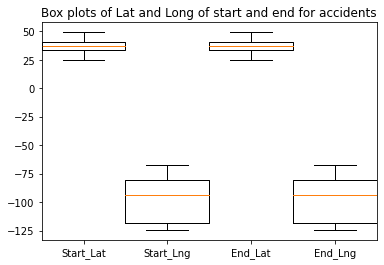

In [34]:
plt.boxplot(data_geo, labels=data_geo.columns, showfliers=False, widths=(1,1,1,1))
plt.title("Box plots of Lat and Long of start and end for accidents")

Text(0.5, 1.0, 'Box plots of Distance and Weather Parameters')

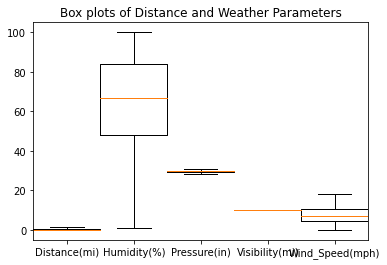

In [35]:
plt.boxplot(data_weather, labels=data_weather.columns, showfliers=False, widths=(1,1,1,1,1))
plt.title("Box plots of Distance and Weather Parameters")

In [36]:
# Correlation
corr_full = data_new.corr()
corr_full

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
Start_Lat,1.000000,-0.103378,0.999995,-0.103372,0.040808,0.038908,-0.162999,-0.073442,0.037831,0.012252,...,-0.056351,0.018750,0.000504,-0.070908,NaN,0.007835,0.017771,0.028925,0.035601,-0.066990
Start_Lng,-0.103378,1.000000,-0.103363,0.999999,0.083976,0.202780,0.174643,-0.007450,0.139436,0.013720,...,0.023121,-0.040464,-0.003739,0.088597,NaN,0.004109,-0.000331,-0.011297,-0.016804,0.059748
End_Lat,0.999995,-0.103363,1.000000,-0.103358,0.040845,0.038905,-0.163001,-0.073440,0.037830,0.012256,...,-0.056350,0.018758,0.000501,-0.070909,NaN,0.007830,0.017764,0.028917,0.035592,-0.066977
End_Lng,-0.103372,0.999999,-0.103358,1.000000,0.083964,0.202778,0.174645,-0.007447,0.139434,0.013719,...,0.023120,-0.040466,-0.003739,0.088594,NaN,0.004108,-0.000332,-0.011299,-0.016806,0.059746
Distance(mi),0.040808,0.083976,0.040845,0.083964,1.000000,0.036918,-0.019475,-0.018822,0.016255,-0.023277,...,-0.038969,-0.012531,-0.003615,-0.098176,NaN,-0.034769,-0.034560,-0.037075,-0.037710,-0.071372
Humidity(%),0.038908,0.202780,0.038905,0.202778,0.036918,1.000000,0.133286,-0.357371,-0.160526,-0.003026,...,-0.000956,-0.007709,-0.003040,-0.055102,NaN,-0.308022,-0.295425,-0.283078,-0.269877,-0.037844
Pressure(in),-0.162999,0.174643,-0.163001,0.174645,-0.019475,0.133286,1.000000,0.001714,-0.015029,0.009969,...,0.037579,-0.006097,0.002655,-0.016548,NaN,0.020853,0.021355,0.021003,0.019646,0.044945
Visibility(mi),-0.073442,-0.007450,-0.073440,-0.007447,-0.018822,-0.357371,0.001714,1.000000,0.029701,0.005512,...,0.012858,0.001018,0.002421,0.035498,NaN,0.049397,0.046293,0.044192,0.043090,0.029590
Wind_Speed(mph),0.037831,0.139436,0.037830,0.139434,0.016255,-0.160526,-0.015029,0.029701,1.000000,0.002376,...,0.018083,-0.011907,-0.001548,0.025292,NaN,0.242821,0.237601,0.227889,0.217933,0.034339
Amenity,0.012252,0.013720,0.012256,0.013719,-0.023277,-0.003026,0.009969,0.005512,0.002376,1.000000,...,0.131039,0.025150,0.010880,0.095645,NaN,0.003698,0.002166,0.000929,0.000059,0.143625


In [37]:
# create a dataframe that stores only the accidents were presence of sign
data_signs=data_new[data_new['Sign']==True]

In [38]:
data_signs.shape

(391866, 29)

In [39]:
percent_signs = data_signs['Severity'].value_counts()/data_signs.shape[0]*100
percent_signs

2    77.691609
3    11.795614
4     6.438936
1     4.073842
Name: Severity, dtype: float64

In [40]:
compare_per = pd.DataFrame({'full_data':percent_df,'after_drop_full_data':percent_data,'sign_present':percent_signs})
compare_per

,full_data,after_drop_full_data,sign_present
2,79.969051,80.659893,77.691609
3,10.623034,10.303287,11.795614
4,7.549286,7.025558,6.438936
1,1.858629,2.011262,4.073842


Note: How the class distribution changes slightly between when signage is there or not. Class 1 

# SAVE DATA RUN ONCE
- Writing different csv files which is used in analysis in other notebooks

In [41]:
data_new_wa.shape

(1370980, 32)

In [42]:
#write statewise timestamped data for wa analysis sheet 
#data_new_wa.to_csv("../../project_data/washington_timestamp_data.csv")

In [43]:
#write data to use in feature selection 
#data_new.to_csv('../../project_data/US_accidents_full_cleaned_1.csv')

In [44]:
#write data to use in feature selection
#data_signs.to_csv('../../project_data/US_accidents_signs_only_cleaned_1.csv')

In [45]:
############# END CODE #######

# NEXT : A2 ---  Explore_Accident_WA_2
- EDA that specifically looks at WA and how it differs from the National Data 